<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:Noureldin Ayman Ghazal

GUC-ID:43-15747

Elective Tutorial No.:T07

**Member 2**

Name:Mohamed Ahmed Mohamed Alekhsasy

GUC-ID:43-16620

Elective Tutorial No.:T03

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
train_plane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_plane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)
train_bird = np.array([plt.imread('Data/train/bird/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_bird = np.array([plt.imread('Data/test/bird/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)
train_truck = np.array([plt.imread('Data/train/truck/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_truck = np.array([plt.imread('Data/test/truck/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)



for i,sample in enumerate(train_plane):
      for j, pixle in enumerate(sample):
        x = pixle /255
        train_plane[i][j]=x
    
#########################################################################################################
for i,sample in enumerate(train_bird):
    for j, pixle in enumerate(sample):
        x = pixle /255
        train_bird[i][j]=x

# #########################################################################################################
    
for i,sample in enumerate(train_truck):
    for j, pixle in enumerate(sample):
        x = pixle /255
        train_truck[i][j]=x  

##########################################################################################################

for i,sample in enumerate(test_plane):
    for j, pixle in enumerate(sample):
        x = pixle /255
        test_plane[i][j]=x
##########################################################################################################
    
for i,sample in enumerate(test_bird):
    for j, pixle in enumerate(sample):
        x = pixle /255
        test_bird[i][j]=x
    
##########################################################################################################  
for i,sample in enumerate(test_truck):
    for j, pixle in enumerate(sample):
        x = pixle /255
        test_truck[i][j]=x

X_train = np.append(train_plane,train_bird,axis=0)
X_train = np.append(X_train,train_truck,axis=0)
X_test= np.append(test_plane,test_bird,axis=0)
X_test = np.append(X_test,test_truck,axis=0)
X_train.shape
# THE image categories are different.

(15000, 3072)

<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [48]:
###
#CODE HERE#
###
def get_memberships(centroids,X_train):
    centroid0 = centroids[0]
    centroid1 = centroids[1]
    centroid2 = centroids[2]
    membership={"cluster0":np.array([]),"cluster1":np.array([]),"cluster2":np.array([])}
    s0=0
    s1=0
    s2=0
    for i  in range(len(X_train)):
        dist0 = np.linalg.norm(X_train[i]-centroid0)
        s0+=dist0
        dist1 = np.linalg.norm(X_train[i]-centroid1)
        s1+=dist1
        dist2 = np.linalg.norm(X_train[i]-centroid2)
        s2+=dist2
        if(dist0 <dist1 and dist0<dist2 ):
            membership["cluster0"]=np.append(membership["cluster0"],[int(i)])
        elif(dist1<dist2):
            membership["cluster1"]=np.append(membership["cluster1"],[int(i)])
        else:
            membership["cluster2"]=np.append(membership["cluster2"],[int(i)])
    
    s0 = s0/len(membership["cluster0"])
    s1 = s1/len(membership["cluster1"])
    s2 = s2/len(membership["cluster2"])
    pixels0=np.zeros((len(membership["cluster0"]), len(X_train[0])))
    for i in range(len(membership["cluster0"])):
        pixels0[i]=np.array([X_train[int(membership["cluster0"][i])]])
    print(pixels0.shape)
    mean0 = pixels0.mean(axis=0)
    del pixels0                  
    pixels1=np.zeros((len(membership["cluster1"]), len(X_train[0])))
    for i in range(len(membership["cluster1"])):
        pixels1[i]=np.array([X_train[int(membership["cluster1"][i])]])
    mean1 = pixels1.mean(axis=0)
    print(pixels1.shape)
    del pixels1                  
    pixels2=np.zeros((len(membership["cluster2"]), len(X_train[0])))
    for i in range(len(membership["cluster2"])):
        pixels2[i]=np.array([X_train[int(membership["cluster2"][i])]])
    mean2 = pixels2.mean(axis=0)
    print(pixels2.shape)
    del pixels2
    centroids=np.array([mean0,mean1,mean2])
    if((centroid0.mean()) == (mean0.mean()) and (centroid1.mean()) == (mean1.mean()) and (centroid2.mean()) == (mean2.mean())):
        m01= np.linalg.norm(centroid0-centroid1)
        m02= np.linalg.norm(centroid0-centroid2)
        m12= np.linalg.norm(centroid1-centroid2)
        r01 = (s0+s1)/m01
        r02 = (s0+s2)/m02
        r12 = (s1+s2)/m12
        dbi = np.max(np.array([r01,r02,r12]))
        return (membership,centroids,dbi)
    else:
            return get_memberships(centroids,X_train)
    
                   
# return (memberships, centroids, dbi)

In [49]:
def get_random_centroid(X_train):
    i = np.random.randint(15000)
    j=np.random.randint(15000)
    k=np.random.randint(15000)
    centroid0 = X_train[i]
    centroid1 = X_train[j]
    centroid2 = X_train[k]
    centroids=np.array([centroid0,centroid1,centroid2])
    return centroids

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [50]:
def get_best(centroids,X_train):
    alloutput = get_memberships(centroids,X_train)
    best_membership_matrix =alloutput[0] 
    best_centroids = alloutput[1]
    best_dbi = alloutput[2]
    for i in range (9):
        centroids = get_random_centroid(X_train)
        alloutput = get_memberships(centroids,X_train)
        dbi = alloutput[2]
        if(dbi< best_dbi):
            best_membership_matrix =alloutput[0] 
            best_centroids = alloutput[1]
            best_dbi = dbi
    return(best_membership_matrix,best_centroids,best_dbi)




In [51]:
centroids= get_random_centroid(X_train)
best = get_best(centroids,X_train)
membership =best[0]
centroids=best[1]
dbi=best[2]
print(membership)
print(centroids)
print(dbi)

(576, 3072)
(3080, 3072)
(11344, 3072)
(1251, 3072)
(4257, 3072)
(9492, 3072)
(1611, 3072)
(5146, 3072)
(8243, 3072)
(1899, 3072)
(5825, 3072)
(7276, 3072)
(2120, 3072)
(6403, 3072)
(6477, 3072)
(2363, 3072)
(6788, 3072)
(5849, 3072)
(2632, 3072)
(7079, 3072)
(5289, 3072)
(2971, 3072)
(7172, 3072)
(4857, 3072)
(3320, 3072)
(7150, 3072)
(4530, 3072)
(3706, 3072)
(7014, 3072)
(4280, 3072)
(4092, 3072)
(6819, 3072)
(4089, 3072)
(4450, 3072)
(6590, 3072)
(3960, 3072)
(4753, 3072)
(6352, 3072)
(3895, 3072)
(4985, 3072)
(6161, 3072)
(3854, 3072)
(5174, 3072)
(5987, 3072)
(3839, 3072)
(5339, 3072)
(5817, 3072)
(3844, 3072)
(5461, 3072)
(5691, 3072)
(3848, 3072)
(5565, 3072)
(5579, 3072)
(3856, 3072)
(5640, 3072)
(5493, 3072)
(3867, 3072)
(5692, 3072)
(5429, 3072)
(3879, 3072)
(5730, 3072)
(5382, 3072)
(3888, 3072)
(5752, 3072)
(5349, 3072)
(3899, 3072)
(5765, 3072)
(5326, 3072)
(3909, 3072)
(5780, 3072)
(5306, 3072)
(3914, 3072)
(5794, 3072)
(5286, 3072)
(3920, 3072)
(5801, 3072)
(5273, 3072)

(5160, 3072)
(3935, 3072)
(5905, 3072)
(5172, 3072)
(3935, 3072)
(5893, 3072)
(5184, 3072)
(3936, 3072)
(5880, 3072)
(5201, 3072)
(3937, 3072)
(5862, 3072)
(5217, 3072)
(3938, 3072)
(5845, 3072)
(5230, 3072)
(3939, 3072)
(5831, 3072)
(5238, 3072)
(3937, 3072)
(5825, 3072)
(5243, 3072)
(3935, 3072)
(5822, 3072)
(5246, 3072)
(3934, 3072)
(5820, 3072)
(5248, 3072)
(3933, 3072)
(5819, 3072)
(5248, 3072)
(3933, 3072)
(5819, 3072)
{'cluster0': array([1.0000e+00, 4.0000e+00, 5.0000e+00, ..., 1.4990e+04, 1.4992e+04,
       1.4997e+04]), 'cluster1': array([0.0000e+00, 2.0000e+00, 9.0000e+00, ..., 1.4995e+04, 1.4998e+04,
       1.4999e+04]), 'cluster2': array([3.0000e+00, 6.0000e+00, 8.0000e+00, ..., 1.4989e+04, 1.4993e+04,
       1.4996e+04])}
[[0.37120791 0.4012717  0.36779852 ... 0.42196995 0.42319447 0.36842393]
 [0.69681794 0.74168146 0.77468513 ... 0.47325781 0.46755827 0.4273768 ]
 [0.6981962  0.7545259  0.7973939  ... 0.70964694 0.73146942 0.73855348]]
9.43640666056608


In [52]:
predict={"plane":[],"bird":[],"truck":[]}


# to detect plane
c0=0
c1=0
c2=0
max_count_plane=0
for i in range(5000):
    if(i in membership["cluster0"]):
        c0+=1
    elif(i in membership["cluster1"]):
        c1+=1
    elif(i in membership["cluster2"]):
        c2+=1

if(c0>c1 and c0>c2):
    max_count_plane=c0
    predict["plane"] = centroids[0]
elif(c1>c2):
    max_count_plane=c1
    predict["plane"] = centroids[1]
else:
    max_count_plane=c2
    predict["plane"] = centroids[2]

# to detect bird
c0=0
c1=0
c2=0
max_count_bird=0
for i in range(5000,10000):
    if(i in membership["cluster0"]):
        c0+=1
    elif(i in membership["cluster1"]):
        c1+=1
    elif(i in membership["cluster2"]):
        c2+=1
if(c0>c1 and c0>c2):
    max_count_bird=c0
    predict["bird"] = centroids[0]
elif(c1>c2):
    max_count_bird=c1
    predict["bird"] = centroids[1]
else:
    max_count_bird=c2
    predict["bird"] = centroids[2]

# to detect truck
c0=0
c1=0
c2=0
max_count_truck=0
for i in range(10000,15000):
    if(i in membership["cluster0"]):
        c0+=1
    elif(i in membership["cluster1"]):
        c1+=1
    elif(i in membership["cluster2"]):
        c2+=1
if(c0>c1 and c0>c2):
    max_count_truck=c0
    predict["truck"] = centroids[0]
elif(c1>c2):
    max_count_truck=c1
    predict["truck"] = centroids[1]
else:
    max_count_truck=c2
    predict["truck"] = centroids[2]
    

max_counts = [max_count_plane,max_count_bird,max_count_truck]
print(max_counts)

[2183, 3015, 2889]


In [53]:
#classify plane
classified_plane=0
classified_bird=0
classified_truck=0
for i in range(1000):
    dist0 = np.linalg.norm(X_test[i]-predict["plane"])
    dist1 = np.linalg.norm(X_test[i]-predict["bird"])
    dist2 = np.linalg.norm(X_test[i]-predict["truck"])
    if(dist0<dist1 and dist0<dist2):
        classified_plane+=1
    elif(dist1<dist2 and dist1<dist0):
        classified_bird+=1
    elif(dist2<dist0 and dist2<dist1):
        classified_truck+=1
planeclass = [classified_plane,classified_bird,classified_truck]

#classify bird
classified_plane=0
classified_bird=0
classified_truck=0
for i in range(1000,2000):
    dist0 = np.linalg.norm(X_test[i]-predict["plane"])
    dist1 = np.linalg.norm(X_test[i]-predict["bird"])
    dist2 = np.linalg.norm(X_test[i]-predict["truck"])
    if(dist0<dist1 and dist0<dist2):
        classified_plane+=1
    elif(dist1<dist2 and dist1<dist0):
        classified_bird+=1
    elif(dist2<dist0 and dist2<dist1):
        classified_truck+=1
birdclass = [classified_plane,classified_bird,classified_truck]

#classify truck
classified_plane=0
classified_bird=0
classified_truck=0
for i in range(2000,3000):
    dist0 = np.linalg.norm(X_test[i]-predict["plane"])
    dist1 = np.linalg.norm(X_test[i]-predict["bird"])
    dist2 = np.linalg.norm(X_test[i]-predict["truck"])
    if(dist0<dist1 and dist0<dist2):
        classified_plane+=1
    elif(dist1<dist2 and dist1<dist0):
        classified_bird+=1
    elif(dist2<dist0 and dist2<dist1):
        classified_truck+=1
truckclass = [classified_plane,classified_bird,classified_truck]


confusion_matrix=np.array([planeclass,birdclass,truckclass])

<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

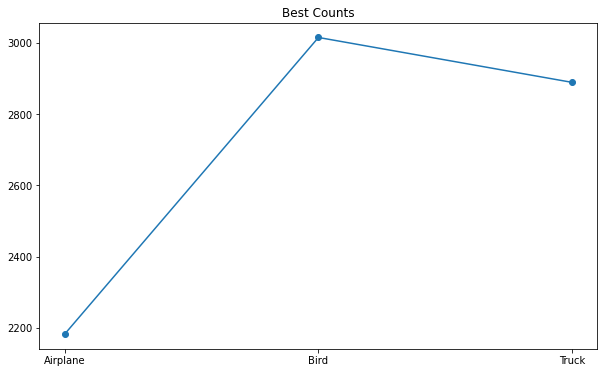

In [54]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

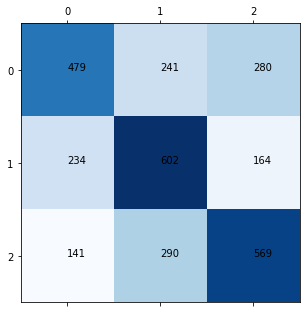

In [55]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))